<h2><center> Technology Trends and Tech Industry Demographics Project-Proyecto de tendencias tecnología y demografía de la industria tecnológica</center></h2>

In [1]:
!pip install pingouin
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_diabetes
import statsmodels.api as sm
import pingouin as pg
from scipy import stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




In [2]:
data_demo= pd.read_csv('m5_survey_data_demographics.csv', header=0)


In [3]:
#data_technologies= pd.read_csv('m5_survey_data_technologies_normalised.csv',header=0)

#The database were cleaned of secondary answers using excel in order to maintain the accuracy of Data without effect to much the consistency.
#La base de datos se limpió de respuestas secundarias utilizando Excel para mantener la precisión de los datos sin afectar mucho la consistencia.

data_technologies= pd.read_excel('m5_survey_data_technologies_normalised.xlsx', header=0)

In [4]:
df1=data_technologies.replace('?',np.NaN)
df2=data_demo.replace('?',np.NaN)


<h3><center> Cleaning Data - Limpieza de Datos</center></h3>

In [5]:
df1.drop_duplicates()

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron,Respondent - Copy
0,4,C,C,MySQL,MySQL,Linux,Linux,NaN,NaN,Eclipse,4
1,9,Bash/Shell/PowerShell,Bash/Shell/PowerShell,DynamoDB,PostgreSQL,AWS,AWS,Express,Express,Vim,9
2,13,Bash/Shell/PowerShell,Bash/Shell/PowerShell,Couchbase,Firebase,Android,Android,Angular/Angular.js,Express,Vim,13
3,16,Bash/Shell/PowerShell,C#,MongoDB,Elasticsearch,NaN,AWS,Angular/Angular.js,Angular/Angular.js,Visual Studio,16
4,17,Bash/Shell/PowerShell,Bash/Shell/PowerShell,MongoDB,Elasticsearch,Arduino,Docker,Angular/Angular.js,Angular/Angular.js,IntelliJ,17
...,...,...,...,...,...,...,...,...,...,...,...
11393,25136,C#,C#,Microsoft SQL Server,Microsoft SQL Server,Kubernetes,AWS,ASP.NET,Vue.js,Eclipse,25136
11394,25137,HTML/CSS,HTML/CSS,MySQL,MariaDB,AWS,Android,NaN,jQuery,NetBeans,25137
11395,25138,Assembly,C#,PostgreSQL,NaN,Linux,Android,NaN,NaN,Eclipse,25138
11396,25141,Bash/Shell/PowerShell,C++,Microsoft SQL Server,Elasticsearch,Android,Android,Angular/Angular.js,Angular/Angular.js,Atom,25141


In [6]:
df1 = df1.drop_duplicates()
df1

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron,Respondent - Copy
0,4,C,C,MySQL,MySQL,Linux,Linux,NaN,NaN,Eclipse,4
1,9,Bash/Shell/PowerShell,Bash/Shell/PowerShell,DynamoDB,PostgreSQL,AWS,AWS,Express,Express,Vim,9
2,13,Bash/Shell/PowerShell,Bash/Shell/PowerShell,Couchbase,Firebase,Android,Android,Angular/Angular.js,Express,Vim,13
3,16,Bash/Shell/PowerShell,C#,MongoDB,Elasticsearch,NaN,AWS,Angular/Angular.js,Angular/Angular.js,Visual Studio,16
4,17,Bash/Shell/PowerShell,Bash/Shell/PowerShell,MongoDB,Elasticsearch,Arduino,Docker,Angular/Angular.js,Angular/Angular.js,IntelliJ,17
...,...,...,...,...,...,...,...,...,...,...,...
11393,25136,C#,C#,Microsoft SQL Server,Microsoft SQL Server,Kubernetes,AWS,ASP.NET,Vue.js,Eclipse,25136
11394,25137,HTML/CSS,HTML/CSS,MySQL,MariaDB,AWS,Android,NaN,jQuery,NetBeans,25137
11395,25138,Assembly,C#,PostgreSQL,NaN,Linux,Android,NaN,NaN,Eclipse,25138
11396,25141,Bash/Shell/PowerShell,C++,Microsoft SQL Server,Elasticsearch,Android,Android,Angular/Angular.js,Angular/Angular.js,Atom,25141


In [7]:
df2.drop_duplicates()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult
11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,34.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
11396,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",NaN,...,Somewhat less wel

In [8]:
df2 = df2.drop_duplicates()
df2

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult
11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,34.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
11396,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",NaN,...,Somewhat less wel

 <h4>Initial Heatmap (df1,df2)- Heatmap Inicial (df1-df2)</h4>

<AxesSubplot:>

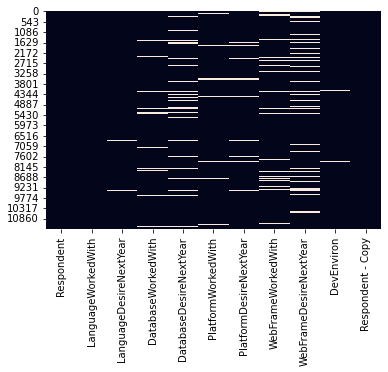

In [9]:
sns.heatmap(df1.isnull(), cbar=False)

<AxesSubplot:>

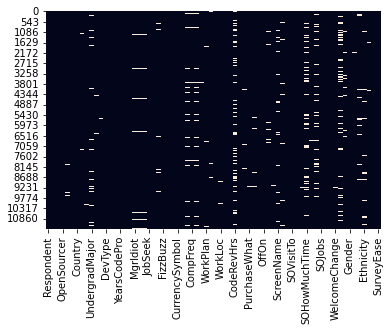

In [10]:
sns.heatmap(df2.isnull(), cbar=False)

After seeing all NAN values these values were replaced by the most recurrent value in the each column. 
Since in the column 'PlatformDesireNextYear' there was more than 10% of NAN values, each row where there was a NAN value was dropped. 
Columns 'WebFrameDesireNextYear' and 'WebFrameDesireNextYear' were removed due to their massive lack of data.


Después de ver todos los datos faltantes, estos fueron reemplazados por el valor más recurrente en cada columna.
Dado que en la columna 'PlatformDesireNextYear' había más del 10 % de  valores faltantes, se eliminó cada fila donde había un valor faltante.
Las columnas 'WebFrameDesireNextYear' y 'WebFrameDesireNextYear' se eliminaron debido a su gran falta de datos.


In [11]:
print("missing values in LanguageWorkedWith: ", str(df1['LanguageWorkedWith'].isnull().sum()))

df1['LanguageWorkedWith'].fillna(df1['LanguageWorkedWith'].mode()[0], inplace=True)
print("missing values in LanguageWorkedWith after impugnation: " + 
      str(df1['LanguageWorkedWith'].isnull().sum()))

missing values in LanguageWorkedWith:  11
missing values in LanguageWorkedWith after impugnation: 0


In [12]:

print("missing values in LanguageWorkedWith: ", str(df1['LanguageDesireNextYear'].isnull().sum()))
df1['LanguageDesireNextYear'].fillna(df1['LanguageDesireNextYear'].mode()[0], inplace=True)
print("missing values in  LanguageDesireNextYear after impugnation: " + 
      str(df1['LanguageDesireNextYear'].isnull().sum()))

missing values in LanguageWorkedWith:  134
missing values in  LanguageDesireNextYear after impugnation: 0


In [13]:

print("missing values in DatabaseWorkedWith: ", str(df1['DatabaseWorkedWith'].isnull().sum()))
df1['DatabaseWorkedWith'].fillna(df1['DatabaseWorkedWith'].mode()[0], inplace=True)
print("missing values in  DatabaseWorkedWith after impugnation: " + 
      str(df1['DatabaseWorkedWith'].isnull().sum()))

missing values in DatabaseWorkedWith:  453
missing values in  DatabaseWorkedWith after impugnation: 0


In [14]:

print("missing values in DatabaseDesireNextYear: ", str(df1['DatabaseDesireNextYear'].isnull().sum()))
df1['DatabaseDesireNextYear'].fillna(df1['DatabaseDesireNextYear'].mode()[0], inplace=True)
print("missing values in  DatabaseDesireNextYear after impugnation: " + 
      str(df1['DatabaseDesireNextYear'].isnull().sum()))

missing values in DatabaseDesireNextYear:  1042
missing values in  DatabaseDesireNextYear after impugnation: 0


In [15]:

print("missing values in PlatformWorkedWith: ", str(df1['PlatformWorkedWith'].isnull().sum()))
df1['PlatformWorkedWith'].fillna(df1['PlatformWorkedWith'].mode()[0], inplace=True)
print("missing values in  PlatformWorkedWith after impugnation: " + 
      str(df1['PlatformWorkedWith'].isnull().sum()))



missing values in PlatformWorkedWith:  411
missing values in  PlatformWorkedWith after impugnation: 0


In [16]:
print("missing values in PlatformDesireNextYear: ", str(df1['PlatformDesireNextYear'].isnull().sum()))
df1['PlatformDesireNextYear'].fillna(df1['PlatformDesireNextYear'].mode()[0], inplace=True)
print("missing values in  PlatformDesireNextYear after impugnation: " + 
      str(df1['PlatformDesireNextYear'].isnull().sum()))


missing values in PlatformDesireNextYear:  544
missing values in  PlatformDesireNextYear after impugnation: 0


In [17]:
print("missing values in DevEnviron: ", str(df1['DevEnviron'].isnull().sum()))
df1['DevEnviron'].fillna(df1['DevEnviron'].mode()[0], inplace=True)
print("missing values in  PlatformDesireNextYear after impugnation: " + 
      str(df1['DevEnviron'].isnull().sum()))



missing values in DevEnviron:  29
missing values in  PlatformDesireNextYear after impugnation: 0


In [18]:

print("missing values in DevEnviron: ", str(df1['WebFrameWorkedWith'].isnull().sum()))
df1['WebFrameWorkedWith'].fillna(df1['WebFrameWorkedWith'].mode()[0], inplace=True)
print("missing values in  PlatformDesireNextYear after impugnation: " + 
      str(df1['WebFrameWorkedWith'].isnull().sum()))

missing values in DevEnviron:  1393
missing values in  PlatformDesireNextYear after impugnation: 0


In [19]:

print("missing values in DevEnviron: ", str(df1['WebFrameDesireNextYear'].isnull().sum()))
df1['WebFrameDesireNextYear'].fillna(df1['WebFrameDesireNextYear'].mode()[0], inplace=True)
print("missing values in  PlatformDesireNextYear after impugnation: " + 
      str(df1['WebFrameDesireNextYear'].isnull().sum()))

missing values in DevEnviron:  1617
missing values in  PlatformDesireNextYear after impugnation: 0


In [20]:
df1=df1.drop(['Respondent - Copy'], axis=1)

After seeing all NAN values these values were replaced by the most recurrent value in the each column. 
Since in the column 'PlatformDesireNextYear' there was more than 10% of NAN values, each row where there was a NAN value was dropped. 
Columns 'WebFrameDesireNextYear' and 'WebFrameDesireNextYear' were removed due to their massive lack of data.


Después de ver todos los datos faltantes, estos fueron reemplazados por el valor más recurrente en cada columna.
Dado que en la columna 'PlatformDesireNextYear' había más del 10 % de  valores faltantes, se eliminó cada fila donde había un valor faltante.
Las columnas 'WebFrameDesireNextYear' y 'WebFrameDesireNextYear' se eliminaron debido a su gran falta de datos.


In [21]:
print("missing values in Student: ", str(df2['Student'].isnull().sum()))
df2['Student'].fillna(df2['Student'].mode()[0], inplace=True)
print("missing values in  Student after impugnation: " + 
      str(df2['Student'].isnull().sum()))


missing values in Student:  51
missing values in  Student after impugnation: 0


In [22]:
print("missing values in EdLevel: ", str(df2['EdLevel'].isnull().sum()))
df2['EdLevel'].fillna(df2['EdLevel'].mode()[0], inplace=True)
print("missing values in  EdLevel after impugnation: " + 
      str(df2['EdLevel'].isnull().sum()))

missing values in EdLevel:  112
missing values in  EdLevel after impugnation: 0


In [23]:
print("missing values in UndergradMajor: ", str(df2['UndergradMajor'].isnull().sum()))
df2['UndergradMajor'].fillna(df2['UndergradMajor'].mode()[0], inplace=True)
print("missing values in  EdLevel after impugnation: " + 
      str(df2['EdLevel'].isnull().sum()))

missing values in UndergradMajor:  737
missing values in  EdLevel after impugnation: 0


In [24]:
print("missing values in OrgSize: ", str(df2['OrgSize'].isnull().sum()))
df2['OrgSize'].fillna(df2['OrgSize'].mode()[0], inplace=True)
print("missing values in  OrgSize after impugnation: " + 
      str(df2['OrgSize'].isnull().sum()))

missing values in OrgSize:  96
missing values in  OrgSize after impugnation: 0


In [25]:

print("missing values in DevType: ", str(df2['DevType'].isnull().sum()))
df2['DevType'].fillna(df2['DevType'].mode()[0], inplace=True)
print("missing values in  DevType after impugnation: " + 
      str(df2['DevType'].isnull().sum()))

missing values in DevType:  65
missing values in  DevType after impugnation: 0


In [26]:

print("missing values in JobSat: ", str(df2['JobSat'].isnull().sum()))
df2['JobSat'].fillna(df2['JobSat'].mode()[0], inplace=True)
print("missing values in  JobSat after impugnation: " + 
      str(df2['JobSat'].isnull().sum()))

missing values in JobSat:  1
missing values in  JobSat after impugnation: 0


In [27]:
print("missing values in MgrIdiot: ", str(df2['MgrIdiot'].isnull().sum()))
df2['MgrIdiot'].fillna(df2['MgrIdiot'].mode()[0], inplace=True)
print("missing values in  MgrIdiot after impugnation: " + 
      str(df2['MgrIdiot'].isnull().sum()))

missing values in MgrIdiot:  493
missing values in  MgrIdiot after impugnation: 0


In [28]:

print("missing values in MgrMoney: ", str(df2['MgrMoney'].isnull().sum()))
df2['MgrMoney'].fillna(df2['MgrMoney'].mode()[0], inplace=True)
print("missing values in  MgrMoney after impugnation: " + 
      str(df2['MgrMoney'].isnull().sum()))

missing values in MgrMoney:  497
missing values in  MgrMoney after impugnation: 0


In [29]:

print("missing values in MgrWant: ", str(df2['MgrWant'].isnull().sum()))
df2['MgrWant'].fillna(df2['MgrWant'].mode()[0], inplace=True)
print("missing values in  MgrWant after impugnation: " + 
      str(df2['MgrWant'].isnull().sum()))

missing values in MgrWant:  493
missing values in  MgrWant after impugnation: 0


In [30]:

print("missing values in FizzBuzz: ", str(df2['FizzBuzz'].isnull().sum()))
df2['FizzBuzz'].fillna(df2['FizzBuzz'].mode()[0], inplace=True)
print("missing values in  FizzBuzz after impugnation: " + 
      str(df2['FizzBuzz'].isnull().sum()))

missing values in FizzBuzz:  37
missing values in  FizzBuzz after impugnation: 0


In [31]:
print(df2.dropna(subset=["JobFactors"], axis=0, inplace=True), "columns were dropped")
df2.dropna(subset=["JobFactors"], axis=0, inplace=True)

None columns were dropped


In [32]:
print("missing values in ResumeUpdate: ", str(df2['ResumeUpdate'].isnull().sum()))
df2['ResumeUpdate'].fillna(df2['ResumeUpdate'].mode()[0], inplace=True)
print("missing values in  FizzBuzz after impugnation: " + 
      str(df2['FizzBuzz'].isnull().sum()))

missing values in ResumeUpdate:  39
missing values in  FizzBuzz after impugnation: 0


In [33]:
print("missing values in CompTotal: ", str(df2['CompTotal'].isnull().sum()))
df2['CompTotal'].fillna(df2['CompTotal'].mean(), inplace=True)
print("missing values in  CompTotal after impugnation: " + 
      str(df2['CompTotal'].isnull().sum()))

missing values in CompTotal:  809
missing values in  CompTotal after impugnation: 0


In [34]:
print("missing values in CompFreq: ", str(df2['CompFreq'].isnull().sum()))
df2['CompFreq'].fillna(df2['CompFreq'].mode()[0], inplace=True)
print("missing values in  FizzBuzz after impugnation: " + 
      str(df2['CompFreq'].isnull().sum()))

missing values in CompFreq:  206
missing values in  FizzBuzz after impugnation: 0


In [35]:
print("missing values in ConvertedComp: ", str(df2['ConvertedComp'].isnull().sum()))
df2['ConvertedComp'].fillna(df2['ConvertedComp'].mean(), inplace=True)
print("missing values in  ConvertedComp after impugnation: " + 
      str(df2['ConvertedComp'].isnull().sum()))

missing values in ConvertedComp:  816
missing values in  ConvertedComp after impugnation: 0


In [36]:
print("missing values in WorkWeekHrs: ", str(df2['WorkWeekHrs'].isnull().sum()))
df2['WorkWeekHrs'].fillna(df2['WorkWeekHrs'].mean(), inplace=True)
print("missing values in  WorkWeekHrs after impugnation: " + 
      str(df2['WorkWeekHrs'].isnull().sum()))

missing values in WorkWeekHrs:  122
missing values in  WorkWeekHrs after impugnation: 0


In [37]:

print("missing values in WorkPlan: ", str(df2['WorkPlan'].isnull().sum()))
df2['WorkPlan'].fillna(df2['WorkPlan'].mode()[0], inplace=True)
print("missing values in  WorkPlan after impugnation: " + 
      str(df2['WorkPlan'].isnull().sum()))



missing values in WorkPlan:  121
missing values in  WorkPlan after impugnation: 0


In [38]:
print("missing values in WorkRemote: ", str(df2['WorkRemote'].isnull().sum()))
df2['WorkRemote'].fillna(df2['WorkRemote'].mode()[0], inplace=True)
print("missing values in  WorkRemote after impugnation: " + 
      str(df2['WorkRemote'].isnull().sum()))

missing values in WorkRemote:  8
missing values in  WorkRemote after impugnation: 0


In [39]:
print("missing values in WorkRemote: ", str(df2['WorkLoc'].isnull().sum()))
df2['WorkLoc'].fillna(df2['WorkLoc'].mode()[0], inplace=True)
print("missing values in  WorkRemote after impugnation: " + 
      str(df2['WorkLoc'].isnull().sum()))

missing values in WorkRemote:  32
missing values in  WorkRemote after impugnation: 0


In [40]:
df2['ImpSyn'].value_counts()

print("missing values in ImpSyn: ", str(df2['ImpSyn'].isnull().sum()))
df2['ImpSyn'].fillna(df2['ImpSyn'].mode()[0], inplace=True)
print("missing values in  ImpSyn after impugnation: " + 
      str(df2['ImpSyn'].isnull().sum()))

missing values in ImpSyn:  5
missing values in  ImpSyn after impugnation: 0


In [41]:

print("missing values in CodeRev: ", str(df2['CodeRev'].isnull().sum()))
df2['CodeRev'].fillna(df2['CodeRev'].mode()[0], inplace=True)
print("missing values in  CodeRev after impugnation: " + 
      str(df2['CodeRev'].isnull().sum()))

missing values in CodeRev:  1
missing values in  CodeRev after impugnation: 0


In [42]:
print("missing values in Age1stCode: ", str(df2['Age1stCode'].isnull().sum()))
df2['Age1stCode'].fillna(df2['Age1stCode'].mode()[0], inplace=True)
print("missing values in  Age1stCode after impugnation: " + 
      str(df2['Age1stCode'].isnull().sum()))

missing values in Age1stCode:  13
missing values in  Age1stCode after impugnation: 0


In [43]:
print("missing values in YearsCodePro: ", str(df2['YearsCodePro'].isnull().sum()))
df2['YearsCodePro'].fillna(df2['YearsCodePro'].mode()[0], inplace=True)
print("missing values in  YearsCodePro after impugnation: " + 
      str(df2['YearsCodePro'].isnull().sum()))


missing values in YearsCodePro:  16
missing values in  YearsCodePro after impugnation: 0


In [44]:
print("missing values in YearsCode: ", str(df2['YearsCode'].isnull().sum()))
df2['YearsCode'].fillna(df2['YearsCode'].mode()[0], inplace=True)
print("missing values in  YearsCode after impugnation: " + 
      str(df2['YearsCode'].isnull().sum()))

missing values in YearsCode:  9
missing values in  YearsCode after impugnation: 0


In [45]:

print("missing values in UnitTests: ", str(df2['UnitTests'].isnull().sum()))
df2['UnitTests'].fillna(df2['UnitTests'].mode()[0], inplace=True)
print("missing values in  UnitTests after impugnation: " + 
      str(df2['UnitTests'].isnull().sum()))

missing values in UnitTests:  29
missing values in  UnitTests after impugnation: 0


In [46]:

print("missing values in PurchaseHow: ", str(df2['PurchaseHow'].isnull().sum()))
df2['PurchaseHow'].fillna(df2['PurchaseHow'].mode()[0], inplace=True)
print("missing values in  PurchaseHow after impugnation: " + 
      str(df2['PurchaseHow'].isnull().sum()))

missing values in PurchaseHow:  196
missing values in  PurchaseHow after impugnation: 0


In [47]:
print("missing values in BetterLife: ", str(df2['BetterLife'].isnull().sum()))
df2['BetterLife'].fillna(df2['BetterLife'].mode()[0], inplace=True)
print("missing values in  BetterLife after impugnation: " + 
      str(df2['BetterLife'].isnull().sum()))

missing values in BetterLife:  98
missing values in  BetterLife after impugnation: 0


In [48]:
print("missing values in Extraversion: ", str(df2['Extraversion'].isnull().sum()))
df2['Extraversion'].fillna(df2['Extraversion'].mode()[0], inplace=True)
print("missing values in  Extraversion after impugnation: " + 
      str(df2['Extraversion'].isnull().sum()))

missing values in Extraversion:  20
missing values in  Extraversion after impugnation: 0


In [49]:

print("missing values in Age: ", str(df2['Age'].isnull().sum()))
df2['Age'].fillna(df2['Age'].mean(), inplace=True)
print("missing values in  Age after impugnation: " + 
      str(df2['Age'].isnull().sum()))

missing values in Age:  286
missing values in  Age after impugnation: 0


In [50]:
print("missing values in Gender: ", str(df2['Gender'].isnull().sum()))
df2['Gender'].fillna(df2['Gender'].mode()[0], inplace=True)
print("missing values in  Gender after impugnation: " + 
      str(df2['Gender'].isnull().sum()))

missing values in Gender:  73
missing values in  Gender after impugnation: 0


In [51]:
print("missing values in Trans: ", str(df2['Trans'].isnull().sum()))
df2['Trans'].fillna(df2['Trans'].mode()[0], inplace=True)
print("missing values in  Trans after impugnation: " + 
      str(df2['Trans'].isnull().sum()))

missing values in Trans:  123
missing values in  Trans after impugnation: 0


In [52]:
print("missing values in Sexuality: ", str(df2['Sexuality'].isnull().sum()))
df2['Sexuality'].fillna(df2['Sexuality'].mode()[0], inplace=True)
print("missing values in  Sexuality after impugnation: " + 
      str(df2['Sexuality'].isnull().sum()))

missing values in Sexuality:  541
missing values in  Sexuality after impugnation: 0


In [53]:

print("missing values in Ethnicity: ", str(df2['Ethnicity'].isnull().sum()))
df2['Ethnicity'].fillna(df2['Ethnicity'].mode()[0], inplace=True)
print("missing values in  Ethnicity after impugnation: " + 
      str(df2['Ethnicity'].isnull().sum()))

missing values in Ethnicity:  675
missing values in  Ethnicity after impugnation: 0


In [54]:

print("missing values in Dependents: ", str(df2['Dependents'].isnull().sum()))
df2['Dependents'].fillna(df2['Dependents'].mode()[0], inplace=True)
print("missing values in  Dependents after impugnation: " + 
      str(df2['Dependents'].isnull().sum()))

missing values in Dependents:  140
missing values in  Dependents after impugnation: 0


In [55]:
df2['SurveyLength'].value_counts()
print("missing values in SurveyLength: ", str(df2['SurveyLength'].isnull().sum()))
df2['Dependents'].fillna(df2['Dependents'].mode()[0], inplace=True)
print("missing values in  Dependents after impugnation: " + 
      str(df2['Dependents'].isnull().sum()))

missing values in SurveyLength:  19
missing values in  Dependents after impugnation: 0


In [56]:
df2=df2.drop(['EduOther','ResumeUpdate','OpenSource','CompTotal','WorkChallenge','CodeRevHrs','ITperson','OffOn','SocialMedia','ScreenName','SOVisit1st','SOVisitFreq','SOVisitTo','SOFindAnswer','SOTimeSaved','SOHowMuchTime','PurchaseWhat','LastInt','WorkPlan','SOAccount', 'SOPartFreq','SOJobs','SOComm','WelcomeChange','SONewContent', 'SurveyLength','SurveyEase','EntTeams'], axis=1)

<h4>Final Heatmap  (df1,df2)-Heatmap Final (df1-df2)</h4>

<AxesSubplot:>

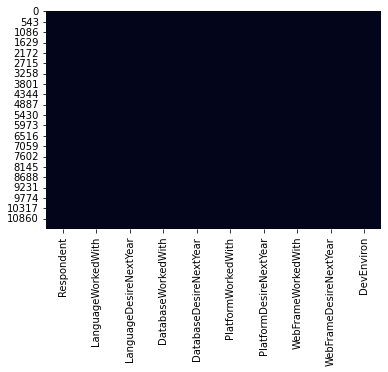

In [57]:
sns.heatmap(df1.isnull(), cbar=False)

<AxesSubplot:>

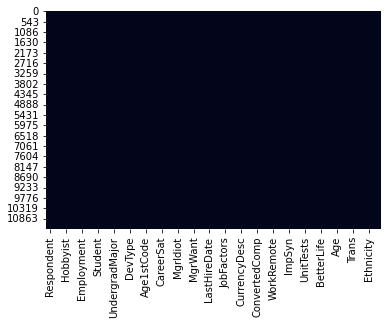

In [58]:
sns.heatmap(df2.isnull(), cbar=False)

<h3><center> Normalization Data - Normalización de Datos</center></h3>

In [59]:
df2['Age']= df2['Age'].astype(int)
df2['ConvertedComp']= df2['ConvertedComp'].astype(int)



In [60]:
df2['YearsCode'].replace("Less than 1 year", "1", inplace = True)
df2['YearsCode']= df2['YearsCode'].astype(int)

In [61]:
df2['YearsCodePro'].replace("Less than 1 year", "1", inplace = True)
df2['YearsCodePro']= df2['YearsCodePro'].astype(int)

In [62]:
df2['Age1stCode'].replace("Younger than 5 years", "5", inplace = True)
df2['Age1stCode']= df2['Age1stCode'].astype(int)

Remove outliers

Text(0.5, 0, 'Number of respondent')

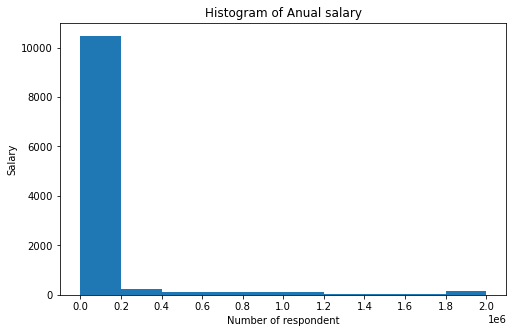

In [63]:
count, bin_edges = np.histogram(df2['ConvertedComp'])

df2['ConvertedComp'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Anual salary') # add a title to the histogram
plt.ylabel('Salary') # add y-label
plt.xlabel('Number of respondent') # add x-label

In [64]:
# IQR
Q1 = np.percentile(df2['ConvertedComp'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df2['ConvertedComp'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df2.shape)
 
# Upper bound
upper = np.where(df2['ConvertedComp'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df2['ConvertedComp'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df2.drop(upper[0], inplace = True)
df2.drop(lower[0], inplace = True)
 
print("New Shape: ", df2.shape)

Old Shape:  (11395, 42)
New Shape:  (10584, 42)


In [65]:

df2.reset_index(inplace=True)

Text(0.5, 0, 'Number of respondent')

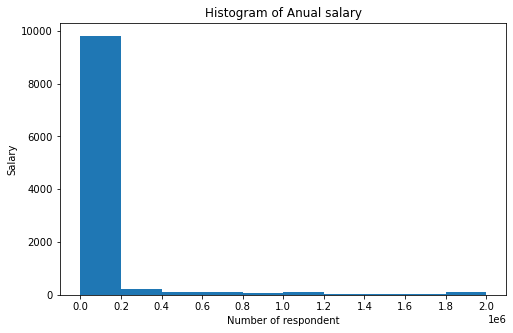

In [66]:
count, bin_edges = np.histogram(df2['ConvertedComp'])

df2['ConvertedComp'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Anual salary') # add a title to the histogram
plt.ylabel('Salary') # add y-label
plt.xlabel('Number of respondent') # add x-label

In [67]:


Q1 = np.percentile(df2['ConvertedComp'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df2['ConvertedComp'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df2.shape)
 
# Upper bound
upper = np.where(df2['ConvertedComp'] >= (Q3+4*IQR))
# Lower bound
lower = np.where(df2['ConvertedComp'] <= (Q1-4*IQR))
 
''' Removing the Outliers '''

df2.drop(upper[0], inplace = True)
df2.drop(lower[0], inplace = True)

df2.reset_index(inplace=True)

print("New Shape: ", df2.shape)




Old Shape:  (10584, 43)
New Shape:  (10063, 44)


Text(0.5, 0, 'Number of respondent')

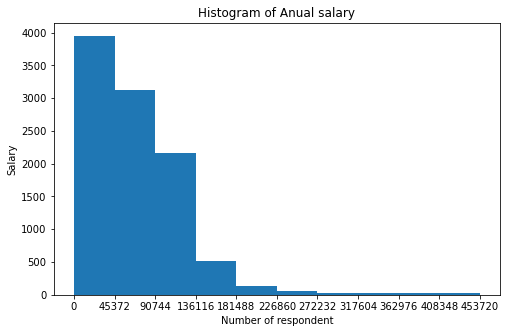

In [68]:
count, bin_edges = np.histogram(df2['ConvertedComp'])

df2['ConvertedComp'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Anual salary') # add a title to the histogram
plt.ylabel('Salary') # add y-label
plt.xlabel('Number of respondent') # add x-label

In [69]:
df2=df2.drop(['index','level_0'], axis=1)
df2.reset_index(inplace=True)


In [70]:
Q1 = np.percentile(df2['ConvertedComp'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df2['ConvertedComp'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df2.shape)
 
# Upper bound
upper = np.where(df2['ConvertedComp'] >= (Q3+4*IQR))
# Lower bound
lower = np.where(df2['ConvertedComp'] <= (Q1-4*IQR))
 
''' Removing the Outliers '''

df2.drop(upper[0], inplace = True)
df2.drop(lower[0], inplace = True)

df2.reset_index(inplace=True)

print("New Shape: ", df2.shape)

Old Shape:  (10063, 43)
New Shape:  (10032, 44)


Text(0.5, 0, 'Number of respondent')

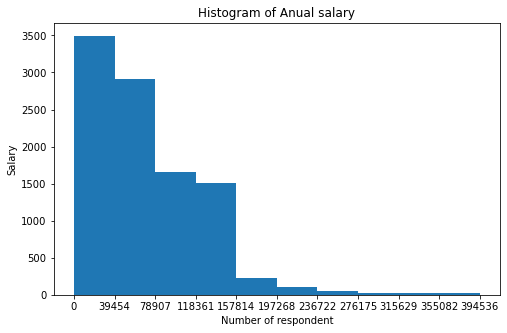

In [71]:
count, bin_edges = np.histogram(df2['ConvertedComp'])

df2['ConvertedComp'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Anual salary') # add a title to the histogram
plt.ylabel('Salary') # add y-label
plt.xlabel('Number of respondent') # add x-label

In [72]:
df2=df2.drop(['index','level_0'], axis=1)

In [73]:
df2.reset_index(inplace=True)

In [74]:
Q1 = np.percentile(df2['ConvertedComp'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df2['ConvertedComp'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df2.shape)
 
# Upper bound
upper = np.where(df2['ConvertedComp'] >= (Q3+4*IQR))
# Lower bound
lower = np.where(df2['ConvertedComp'] <= (Q1-4*IQR))
 
''' Removing the Outliers '''

df2.drop(upper[0], inplace = True)
df2.drop(lower[0], inplace = True)

Old Shape:  (10032, 43)


Text(0.5, 0, 'Number of respondent')

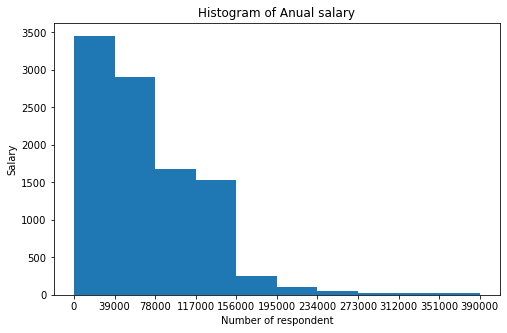

In [75]:
count, bin_edges = np.histogram(df2['ConvertedComp'])

df2['ConvertedComp'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Anual salary') # add a title to the histogram
plt.ylabel('Salary') # add y-label
plt.xlabel('Number of respondent') # add x-label

In [76]:
df2.reset_index(inplace=True)

In [77]:
Q1 = np.percentile(df2['ConvertedComp'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df2['ConvertedComp'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df2.shape)
 
# Upper bound
upper = np.where(df2['ConvertedComp'] >= (Q3+4*IQR))
# Lower bound
lower = np.where(df2['ConvertedComp'] <= (Q1-4*IQR))
 
''' Removing the Outliers '''

df2.drop(upper[0], inplace = True)
df2.drop(lower[0], inplace = True)

Old Shape:  (10027, 44)


Text(0.5, 0, 'Number of respondent')

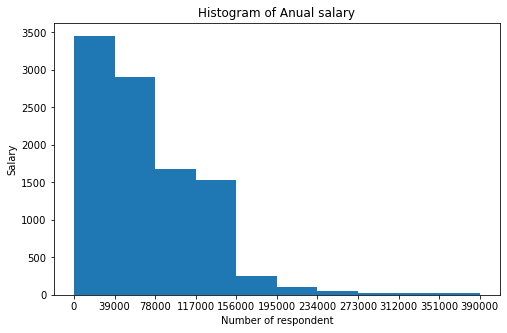

In [78]:
count, bin_edges = np.histogram(df2['ConvertedComp'])

df2['ConvertedComp'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Anual salary') # add a title to the histogram
plt.ylabel('Salary') # add y-label
plt.xlabel('Number of respondent') # add x-label

Age

Text(0.5, 0, 'Number of respondent')

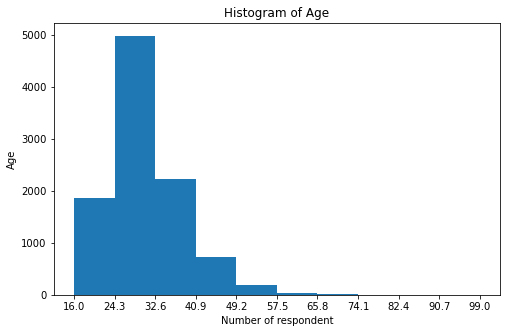

In [79]:
count, bin_edges = np.histogram(df2['Age'])

df2['Age'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Age') # add a title to the histogram
plt.ylabel('Age') # add y-label
plt.xlabel('Number of respondent') # add x-label

In [80]:
df2=df2.drop(['index','level_0'], axis=1)

In [81]:
df2.reset_index(inplace=True)

In [82]:

Q1 = np.percentile(df2['Age'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df2['Age'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df2.shape)
 
# Upper bound
upper = np.where(df2['Age'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df2['Age'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df2.drop(upper[0], inplace = True)
df2.drop(lower[0], inplace = True)
 
print("New Shape: ", df2.shape)

Old Shape:  (10027, 43)
New Shape:  (9679, 43)


Text(0.5, 0, 'Number of respondent')

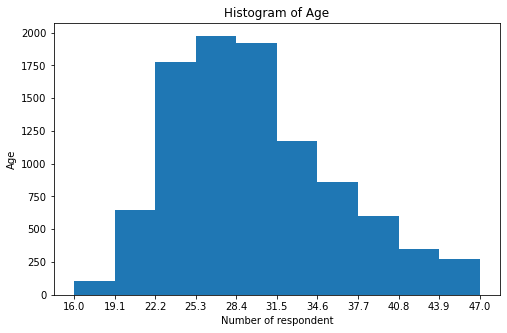

In [83]:
count, bin_edges = np.histogram(df2['Age'])

df2['Age'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Age') # add a title to the histogram
plt.ylabel('Age') # add y-label
plt.xlabel('Number of respondent') # add x-label

Normalize cualitative information


In [84]:
df2.EdLevel.value_counts()

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              5087
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           2301
Some college/university study without earning a degree                                1137
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     449
Associate degree                                                                       326
Other doctoral degree (Ph.D, Ed.D., etc.)                                              203
Professional degree (JD, MD, etc.)                                                     133
Primary/elementary school                                                               25
I never completed any formal education                                                  18
Name: EdLevel, dtype: int64

In [85]:
encoder_edu = OrdinalEncoder(categories=[["I never completed any formal education", "Primary/elementary school", 
                                      "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)", "Some college/university study without earning a degree", "Associate degree", 
                                      "Bachelor’s degree (BA, BS, B.Eng., etc.)", "Professional degree (JD, MD, etc.)", "Master’s degree (MA, MS, M.Eng., MBA, etc.)", "Other doctoral degree (Ph.D, Ed.D., etc.)" 
                                      ]])

In [86]:
encoder_edu.fit(df2[["EdLevel"]])
df2["EdLevel-encoded"] = encoder_edu.transform(df2[["EdLevel"]])

In [87]:
df2.CareerSat.value_counts()

Very satisfied                        3986
Slightly satisfied                    3496
Slightly dissatisfied                  956
Neither satisfied nor dissatisfied     807
Very dissatisfied                      434
Name: CareerSat, dtype: int64

In [88]:
encoder_CarSat = OrdinalEncoder(categories=[["Very dissatisfied", "Slightly dissatisfied", "Neither satisfied nor dissatisfied", "Slightly satisfied", "Very satisfied" ]])

In [89]:
encoder_CarSat.fit(df2[["CareerSat"]])
df2["CareerSat-encoded"] = encoder_CarSat.transform(df2[["CareerSat"]])

In [90]:
df2.JobSat.value_counts()

Slightly satisfied                    3385
Very satisfied                        2958
Slightly dissatisfied                 1569
Neither satisfied nor dissatisfied    1116
Very dissatisfied                      651
Name: JobSat, dtype: int64

In [91]:
encoder_CarSat.fit(df2[["JobSat"]])
df2["JobSat-encoded"] = encoder_CarSat.transform(df2[["JobSat"]])

In [92]:
df2.MgrIdiot.value_counts()

Somewhat confident        4357
Very confident            3546
Not at all confident      1518
I don't have a manager     258
Name: MgrIdiot, dtype: int64

In [93]:
encoder_Mgr = OrdinalEncoder(categories=[["I don't have a manager", "Not at all confident", "Somewhat confident","Very confident" ]])

In [94]:
encoder_Mgr.fit(df2[["MgrIdiot"]])
df2["MgrIdiot-encoded"] = encoder_Mgr.transform(df2[["MgrIdiot"]])

In [95]:
df2.ImpSyn.value_counts()

A little above average    4609
Average                   2224
Far above average         1996
A little below average     690
Far below average          160
Name: ImpSyn, dtype: int64

In [96]:
encoder_ImpSyn = OrdinalEncoder(categories=[["Far below average", "A little below average", "Average","A little above average","Far above average" ]])

In [97]:
encoder_ImpSyn.fit(df2[["ImpSyn"]])
df2["ImpSyn-encoded"] = encoder_ImpSyn.transform(df2[["ImpSyn"]])

In [98]:
df2.Extraversion.value_counts()

In real life (in person)    6089
Online                      2750
Neither                      840
Name: Extraversion, dtype: int64

In [99]:
encoder_Extraversion = OrdinalEncoder(categories=[["Neither", "Online", "In real life (in person)"]])

In [100]:
encoder_Extraversion.fit(df2[["Extraversion"]])
df2["Extraversion-encoded"] = encoder_Extraversion.transform(df2[["Extraversion"]])

Dummy values

In [101]:
df3=pd.merge(df1, df2, on='Respondent')








In [102]:
dummies = pd.get_dummies(df3['LanguageWorkedWith'], drop_first = True)
df3 = pd.concat([df3, dummies], axis = 1)
df3 = df3.drop(columns=['LanguageWorkedWith'], axis=1)



In [103]:
dummies = pd.get_dummies(df3['DatabaseWorkedWith'], drop_first = True)
df3 = pd.concat([df3, dummies], axis = 1)
df3 = df3.drop(columns=['DatabaseWorkedWith'], axis=1)

In [104]:
dummies = pd.get_dummies(df3['PlatformWorkedWith'], drop_first = True)
df3 = pd.concat([df3, dummies], axis = 1)
df3 = df3.drop(columns=['PlatformWorkedWith'], axis=1)


In [105]:
dummies = pd.get_dummies(df3['WebFrameWorkedWith'], drop_first = True)
df3 = pd.concat([df3, dummies], axis = 1)
df3 = df3.drop(columns=['WebFrameWorkedWith'], axis=1)

In [106]:
df1.to_csv("data_technologies_clean.csv", index=False)
df2.to_csv("data_demographics_clean.csv", index=False)
df3.to_csv("data_unificated", index=False)

DATA ANALISIS

In [107]:
df3n=df3._get_numeric_data()
df2n=df2._get_numeric_data()


In [108]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('respondents')
    plt.ylabel('ConvertedComp')

    plt.show()
    plt.close()

In [109]:
pearson=df3n.corr(method='pearson')
pearson


,Respondent,index,YearsCode,Age1stCode,YearsCodePro,ConvertedComp,WorkWeekHrs,Age,EdLevel-encoded,CareerSat-encoded,...,Drupal,Express,Flask,Laravel,Other(s):,React.js,Ruby on Rails,Spring,Vue.js,jQuery
Respondent,1.000000,0.999950,-0.006506,0.007629,-0.013993,0.009535,-0.015673,-0.003951,0.002285,-0.004041,...,0.011546,-0.002032,0.003942,0.001939,0.002785,-0.010903,-0.004544,-0.010804,0.001956,0.012744
index,0.999950,1.000000,-0.006413,0.007580,-0.013876,0.009452,-0.015781,-0.003854,0.002143,-0.003938,...,0.011790,-0.001901,0.003856,0.001908,0.002785,-0.011016,-0.004641,-0.010784,0.001812,0.012694
YearsCode,-0.006506,-0.006413,1.000000,-0.436701,0.835172,0.291831,0.033386,0.728240,0.096317,0.011209,...,0.015907,-0.048865,-0.000469,-0.024844,0.032081,0.004504,0.017311,0.011773,0.005572,-0.009434
Age1stCode,0.007629,0.007580,-0.436701,1.000000,-0.270413,-0.117290,-0.010015,-0.095888,0.049247,-0.046008,...,-0.017243,0.006866,-0.024232,0.002550,-0.000087,-0.004496,-0.015511,0.025740,-0.018564,0.017397
YearsCodePro,-0.013993,-0.013876,0.835172,-0.270413,1.000000,0.302133,0.036672,0.772447,0.062215,0.009724,...,0.030325,-0.047839,-0.027478,-0.030922,0.027827,-0.002682,0.016025,0.014912,-0.000018,-0.010899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
React.js,-0.010903,-0.011016,0.004504,-0.004496,-0.002682,0.067425,0.003702,0.008267,0.013023,0.046401,...,-0.025933,-0.067846,-0.049385,-0.025469,-0.030601,1.000000,-0.027281,-0.044909,-0.016770,-0.082731
Ruby on Rails,-0.004544,-0.004641,0.017311,-0.015511,0.016025,0.028922,0.000928,0.025348,-0.011641,0.003570,...,-0.012538,-0.032801,-0.023876,-0.012313,-0.014795,-0.027281,1.000000,-0.021712,-0.008108,-0.039998
Spring,-0.010804,-0.010784,0.011773,0.025740,0.014912,-0.001206,-0.005014,0.015111,0.041085,-0.027266,...,-0.020639,-0.053996,-0.039303,-0.020270,-0.024354,-0.044909,-0.021712,1.000000,-0.013347,-0.065842
Vue.js,0.001956,0.001812,0.005572,-0.018564,-0.000018,0.004341,0.014009,-0.005166,-0.013035,0.002810,...,-0.007707,-0.020163,-0.014677,-0.007569,-0.009094,-0.016770,-0.008108,-0.013347,1.000000,-0.024587


In [110]:
spearman=df3n.corr(method='spearman')
spearman

,Respondent,index,YearsCode,Age1stCode,YearsCodePro,ConvertedComp,WorkWeekHrs,Age,EdLevel-encoded,CareerSat-encoded,...,Drupal,Express,Flask,Laravel,Other(s):,React.js,Ruby on Rails,Spring,Vue.js,jQuery
Respondent,1.000000,1.000000,-0.006095,0.008288,-0.014756,0.007181,-0.012202,-0.004627,0.001998,-0.002964,...,0.011829,-0.001879,0.003827,0.001932,0.002772,-0.011016,-0.004644,-0.010793,0.001784,0.012704
index,1.000000,1.000000,-0.006095,0.008288,-0.014756,0.007181,-0.012202,-0.004627,0.001998,-0.002964,...,0.011829,-0.001879,0.003827,0.001932,0.002772,-0.011016,-0.004644,-0.010793,0.001784,0.012704
YearsCode,-0.006095,-0.006095,1.000000,-0.429033,0.819162,0.330874,0.037995,0.679691,0.120861,0.010339,...,0.014253,-0.052639,0.000208,-0.023385,0.022374,0.002985,0.017097,0.015239,0.001795,-0.010646
Age1stCode,0.008288,0.008288,-0.429033,1.000000,-0.261108,-0.147896,0.039221,-0.119376,0.055055,-0.055046,...,-0.015473,0.003078,-0.025795,0.004950,-0.000942,-0.014343,-0.015928,0.028691,-0.016881,0.012578
YearsCodePro,-0.014756,-0.014756,0.819162,-0.261108,1.000000,0.352692,0.073574,0.750708,0.096783,0.010097,...,0.032192,-0.057983,-0.025692,-0.030832,0.023482,-0.000351,0.022859,0.012800,0.000728,-0.011623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
React.js,-0.011016,-0.011016,0.002985,-0.014343,-0.000351,0.077353,-0.021158,0.009453,0.011854,0.050398,...,-0.025933,-0.067846,-0.049385,-0.025469,-0.030601,1.000000,-0.027281,-0.044909,-0.016770,-0.082731
Ruby on Rails,-0.004644,-0.004644,0.017097,-0.015928,0.022859,0.036315,-0.008853,0.025643,-0.012676,0.003021,...,-0.012538,-0.032801,-0.023876,-0.012313,-0.014795,-0.027281,1.000000,-0.021712,-0.008108,-0.039998
Spring,-0.010793,-0.010793,0.015239,0.028691,0.012800,0.001234,0.005970,0.014920,0.043883,-0.029185,...,-0.020639,-0.053996,-0.039303,-0.020270,-0.024354,-0.044909,-0.021712,1.000000,-0.013347,-0.065842
Vue.js,0.001784,0.001784,0.001795,-0.016881,0.000728,0.006934,0.011951,-0.004451,-0.013584,0.007770,...,-0.007707,-0.020163,-0.014677,-0.007569,-0.009094,-0.016770,-0.008108,-0.013347,1.000000,-0.024587


In [111]:
kendall=df3n.corr('kendall')
kendall

,Respondent,index,YearsCode,Age1stCode,YearsCodePro,ConvertedComp,WorkWeekHrs,Age,EdLevel-encoded,CareerSat-encoded,...,Drupal,Express,Flask,Laravel,Other(s):,React.js,Ruby on Rails,Spring,Vue.js,jQuery
Respondent,1.000000,1.000000,-0.004103,0.005743,-0.010172,0.004814,-0.008862,-0.003174,0.001480,-0.002271,...,0.009659,-0.001534,0.003125,0.001577,0.002264,-0.008995,-0.003792,-0.008813,0.001457,0.010374
index,1.000000,1.000000,-0.004103,0.005743,-0.010172,0.004814,-0.008862,-0.003174,0.001480,-0.002271,...,0.009659,-0.001534,0.003125,0.001577,0.002264,-0.008995,-0.003792,-0.008813,0.001457,0.010374
YearsCode,-0.004103,-0.004103,1.000000,-0.316253,0.671146,0.233133,0.028401,0.523326,0.095267,0.008004,...,0.011928,-0.044053,0.000174,-0.019571,0.018725,0.002498,0.014308,0.012753,0.001502,-0.008910
Age1stCode,0.005743,0.005743,-0.316253,1.000000,-0.189163,-0.104170,0.029763,-0.079442,0.043054,-0.043378,...,-0.013077,0.002601,-0.021801,0.004184,-0.000796,-0.012122,-0.013462,0.024248,-0.014267,0.010630
YearsCodePro,-0.010172,-0.010172,0.671146,-0.189163,1.000000,0.251139,0.055457,0.605287,0.076809,0.007930,...,0.027231,-0.049048,-0.021733,-0.026081,0.019863,-0.000297,0.019337,0.010827,0.000616,-0.009832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
React.js,-0.008995,-0.008995,0.002498,-0.012122,-0.000297,0.063377,-0.018864,0.007909,0.011004,0.046807,...,-0.025933,-0.067846,-0.049385,-0.025469,-0.030601,1.000000,-0.027281,-0.044909,-0.016770,-0.082731
Ruby on Rails,-0.003792,-0.003792,0.014308,-0.013462,0.019337,0.029753,-0.007893,0.021455,-0.011768,0.002806,...,-0.012538,-0.032801,-0.023876,-0.012313,-0.014795,-0.027281,1.000000,-0.021712,-0.008108,-0.039998
Spring,-0.008813,-0.008813,0.012753,0.024248,0.010827,0.001011,0.005322,0.012483,0.040737,-0.027105,...,-0.020639,-0.053996,-0.039303,-0.020270,-0.024354,-0.044909,-0.021712,1.000000,-0.013347,-0.065842
Vue.js,0.001457,0.001457,0.001502,-0.014267,0.000616,0.005681,0.010655,-0.003724,-0.012610,0.007216,...,-0.007707,-0.020163,-0.014677,-0.007569,-0.009094,-0.016770,-0.008108,-0.013347,1.000000,-0.024587


In [112]:
df4n=df3n[['ConvertedComp','YearsCode','YearsCodePro','Age']]

In [113]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [114]:
y_data = df4n['ConvertedComp']

In [115]:
x_data=df4n.drop('ConvertedComp',axis=1)

In [116]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 2904
number of training samples: 6775


In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
lre=LinearRegression()

In [119]:
lre.fit(x_train[['YearsCodePro']], y_train)

LinearRegression()

In [120]:
print('YearsCodePro Ire score train:',lre.score(x_train[['YearsCodePro']], y_train))
print('YearsCodePro Ire score test:',lre.score(x_test[['YearsCodePro']], y_test))

YearsCodePro Ire score train: 0.08894788635887196
YearsCodePro Ire score test: 0.09640684998852622


In [121]:
lre.fit(x_train[['YearsCode']], y_train)

LinearRegression()

In [122]:
print('YearsCode Ire score train:',lre.score(x_train[['YearsCode']], y_train))
print('YearsCode Ire score test:',lre.score(x_test[['YearsCode']], y_test))

YearsCode Ire score train: 0.08579854179149682
YearsCode Ire score test: 0.08344655780599008


In [123]:
lre.fit(x_train[['Age']], y_train)

LinearRegression()

In [124]:
print('Age Ire score train:',lre.score(x_train[['Age']], y_train))
print('Age Ire score test:',lre.score(x_test[['Age']], y_test))

Age Ire score train: 0.08258471865502437
Age Ire score test: 0.09090573671242375


In [125]:
from sklearn.model_selection import cross_val_score
Rcross1 = cross_val_score(lre, x_data[['YearsCode']], y_data, cv=4)

In [126]:
print("The mean of the folds are", Rcross1.mean(), "and the standard deviation is" , Rcross1.std())

The mean of the folds are 0.08378586126036122 and the standard deviation is 0.004333112045048878


In [127]:
Rcross2 = cross_val_score(lre, x_data[['Age']], y_data, cv=4)
print("The mean of the folds are", Rcross2.mean(), "and the standard deviation is" , Rcross2.std())

The mean of the folds are 0.08365924795741903 and the standard deviation is 0.00853497257615371


In [128]:
from sklearn.model_selection import cross_val_predict

In [129]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [130]:
yhat_train = lr.predict(x_train)
yhat_train[0:5]

array([ 49052.14019637,  70240.79871051,  55167.05485851,  62400.75022094,
       108411.48080859])

In [131]:
yhat_test = lr.predict(x_test)
yhat_test[0:5]


array([62612.35383225, 54325.72787247, 57963.81548136, 63467.70296684,
       57738.1897215 ])

In [132]:
poly = LinearRegression()
poly.fit(x_train, y_train)

LinearRegression()

In [133]:
poly.score(x_train, y_train)

0.10028685893921929

In [134]:
poly.score(x_test, y_test)

0.1067344999345986

c:\Users\jandr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\jandr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


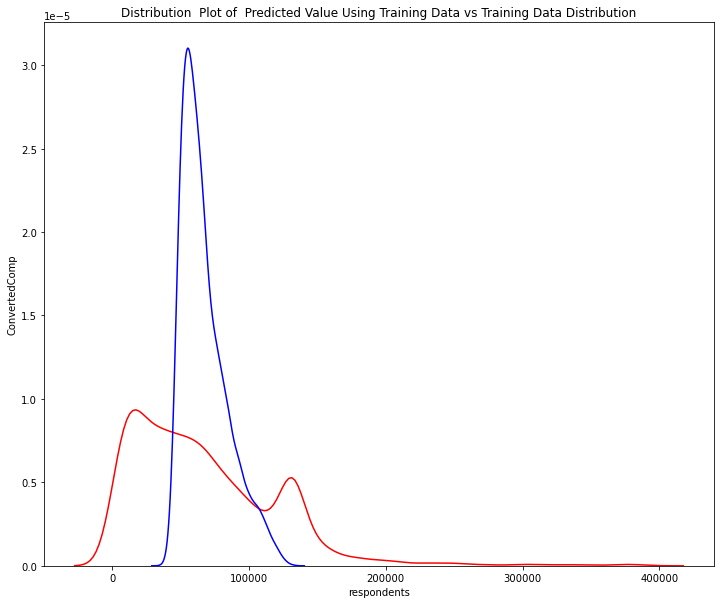

In [135]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [136]:
from sklearn.preprocessing import PolynomialFeatures

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0)

Text(3, 0.75, 'Maximum R^2 ')

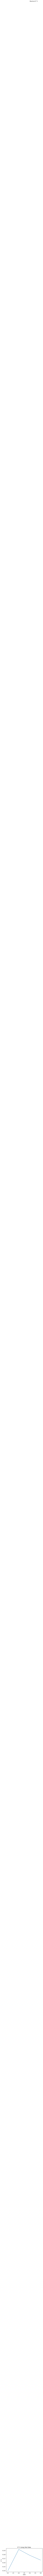

In [138]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train)
    
    x_test_pr = pr.fit_transform(x_test)    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')   

In [139]:
pr = PolynomialFeatures(degree=(1, 2))
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
pr

PolynomialFeatures(degree=(1, 2))

In [140]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [141]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([59095.84858124, 91288.72186377, 80044.89133624, 33920.7008523 ,
       66423.18352497])

In [142]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [59095.84858124 91288.72186377 80044.89133624 33920.7008523 ]
True values: [ 29242  40800 130000  14832]


c:\Users\jandr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\jandr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


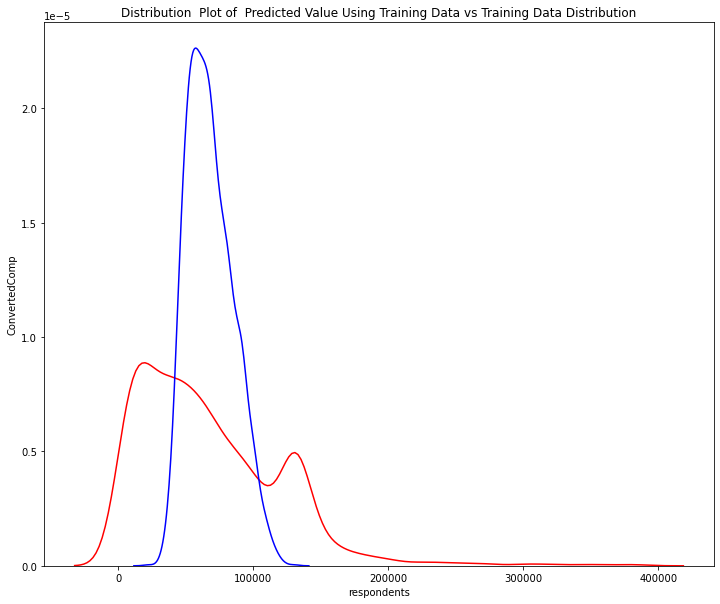

In [143]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, yhat, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [144]:
poly.score(x_train_pr, y_train)

0.10513166746118252

In [145]:
poly.score(x_test_pr, y_test)

0.11926262111574137

In [146]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr.values = pr.fit_transform(x_train)
    x_test_pr.values = pr.fit_transform(x_test)
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train, x_test, y_train,y_test, poly, pr)